### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
import pickle

### import data

In [6]:
train=pd.read_csv(r'E:\Projects\House price prediction kaggle project with deployment\train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
test=pd.read_csv(r'E:\Projects\House price prediction kaggle project with deployment\test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### concat train and test

In [8]:
df=pd.concat([train,test],axis=0).reset_index(drop=True)
df.shape

(2919, 81)

In [9]:
train.shape

(1460, 81)

In [10]:
test.shape

(1459, 80)

In [11]:
null_features=[feature for feature in train.columns if train[feature].isnull().sum()>0]
null_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
len(null_features)

19

In [13]:
def make_dataframe_for_nan(df):
    nan_features=[]
    nan_rows_feature=[]
    perc_nan_rows=[]
    rounded_perc_nan_rows=[]
    for feature in df.columns:
        if (df[feature].isnull().sum())>0:
            nan_rows=df[feature].isnull().sum()
            nan_rows_per=nan_rows/len(df)*100
            rounded_nan_rows_per=np.round(nan_rows_per)
            nan_features.append(feature)
            nan_rows_feature.append(nan_rows)
            perc_nan_rows.append(nan_rows_per)
            rounded_perc_nan_rows.append(rounded_nan_rows_per)
    nan= pd.DataFrame(list(zip(nan_features,nan_rows_feature,perc_nan_rows,rounded_perc_nan_rows)),columns =['feature Name','no of nan rows','percentage of nan rows','rounded percentage of nan rows'])
    nan.index = nan.index + 1
    return nan 

In [14]:
df_null= make_dataframe_for_nan(train)
df_null

,feature Name,no of nan rows,percentage of nan rows,rounded percentage of nan rows
1,LotFrontage,259,17.739726,18.0
2,Alley,1369,93.767123,94.0
3,MasVnrType,8,0.547945,1.0
4,MasVnrArea,8,0.547945,1.0
5,BsmtQual,37,2.534247,3.0
6,BsmtCond,37,2.534247,3.0
7,BsmtExposure,38,2.602740,3.0
8,BsmtFinType1,37,2.534247,3.0
9,BsmtFinType2,38,2.602740,3.0
10,Electrical,1,0.068493,0.0


In [15]:
df_null_40_plus=df_null[df_null['rounded percentage of nan rows']>=40]
df_null_40_plus

,feature Name,no of nan rows,percentage of nan rows,rounded percentage of nan rows
2,Alley,1369,93.767123,94.0
11,FireplaceQu,690,47.260274,47.0
17,PoolQC,1453,99.520548,100.0
18,Fence,1179,80.753425,81.0
19,MiscFeature,1406,96.301370,96.0


In [16]:
plus_40_null_features=list(df_null_40_plus['feature Name'])
plus_40_null_features

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [17]:
len(plus_40_null_features)

5

In [18]:
df=df.drop(plus_40_null_features,axis='columns')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [19]:
df.shape

(2919, 76)

In [20]:
catag_features=[feature for feature in train.columns if len(train[feature].unique())<10]
catag_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [21]:
len(catag_features)

51

In [22]:
quant_features=[feature for feature in train.columns if (train[feature].dtype!='O' and len(train[feature].unique())>10)]
quant_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [23]:
len(quant_features)

26

In [24]:
numerical_features=[feature for feature in train.columns if train[feature].dtype!='O']
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [25]:
len(numerical_features)

38

In [26]:
num_catag_features=[feature for feature in train.columns if(len(train[feature].unique())<10 and train[feature].dtype!='O')]
num_catag_features

['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YrSold']

In [27]:
len(num_catag_features)

11

In [28]:
large_catagary_features=[feature for feature in train.columns if (train[feature].dtype=='O' and len(train[feature].unique())>10)]
large_catagary_features

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [29]:
df=df[numerical_features]
df.shape

(2919, 38)

In [30]:
nan=make_dataframe_for_nan(df)
nan

,feature Name,no of nan rows,percentage of nan rows,rounded percentage of nan rows
1,LotFrontage,486,16.649538,17.0
2,MasVnrArea,23,0.787941,1.0
3,BsmtFinSF1,1,0.034258,0.0
4,BsmtFinSF2,1,0.034258,0.0
5,BsmtUnfSF,1,0.034258,0.0
6,TotalBsmtSF,1,0.034258,0.0
7,BsmtFullBath,2,0.068517,0.0
8,BsmtHalfBath,2,0.068517,0.0
9,GarageYrBlt,159,5.447071,5.0
10,GarageCars,1,0.034258,0.0


In [31]:
null_features=[feature for feature in df.columns if df[feature].isnull().sum()>0]
null_features

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [32]:
len(null_features)

12

In [33]:
null_features[:11]

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [34]:
for feature in null_features[:11]:
    df[feature]=df[feature].fillna(0)

<ipython-input-34-360fc1103a2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature]=df[feature].fillna(0)


In [35]:
df.isnull().sum()

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [36]:
train=df.iloc[:len(train)]
train.shape

(1460, 38)

In [37]:
test=df.iloc[len(train):]
test.shape

(1459, 38)

In [38]:
c_matrix=train.corr()

In [39]:
sale_price_realations=c_matrix['SalePrice']
sale_price_realations.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [40]:
plus_fifty_features=[feature for feature in train.columns if c_matrix['SalePrice'][feature]>=0.50]
plus_fifty_features.remove('SalePrice')
plus_fifty_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [41]:
len(plus_fifty_features)

10

In [42]:
def filling_Null_values_with_zero(data):
    if data.isnull().sum().any()==False:
        print("No Null data !")
    else:
        print('features having Null values are below:')
        null_features=[feature for feature in data.columns if data[feature].isnull().sum()>0]
        print('Null Features:',null_features)
        data[null_features]=data[null_features].fillna(0)
        print('null values are filled with zero')
        return data

In [43]:
df2=filling_Null_values_with_zero(train)

No Null data !


In [44]:
df2==None

True

In [45]:
y=train['SalePrice']
y.shape

(1460,)

In [46]:
X_all_num=train.drop(['SalePrice'],axis='columns')
X_all_num.shape

(1460, 37)

In [47]:
X_strong=train[plus_fifty_features]
X_strong.shape

(1460, 10)

In [48]:
selection = ExtraTreesRegressor()
selection.fit(X_all_num, y)

ExtraTreesRegressor()

In [49]:
selection.feature_importances_

array([0.00393698, 0.00529611, 0.00503792, 0.01244048, 0.29446571,
       0.00828321, 0.04895199, 0.02930468, 0.00740116, 0.02011059,
       0.0021403 , 0.00464837, 0.03794129, 0.03819591, 0.01963966,
       0.00047809, 0.10050425, 0.01016228, 0.00316439, 0.05990636,
       0.00736745, 0.0099559 , 0.00433951, 0.01598432, 0.02503533,
       0.01066404, 0.15277994, 0.03014059, 0.00625825, 0.00655981,
       0.0021276 , 0.00166241, 0.00338022, 0.0033314 , 0.00047334,
       0.00460541, 0.00332473])

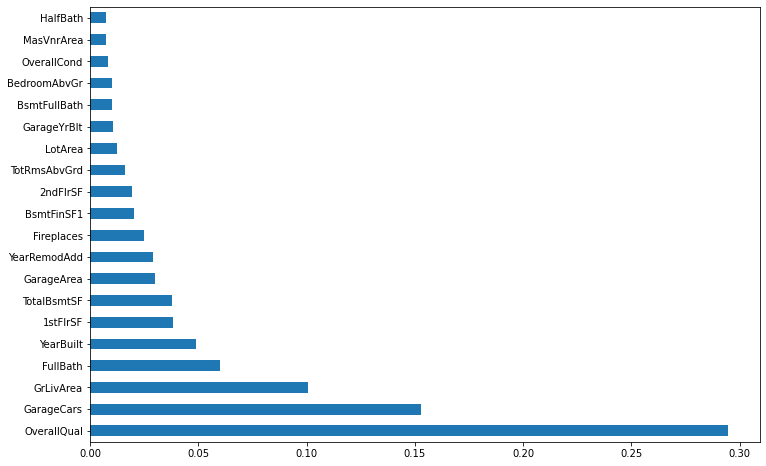

In [52]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_all_num.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [53]:
largest_imp_5=list(feat_importances.nlargest(5).keys())
largest_imp_5

['OverallQual', 'GarageCars', 'GrLivArea', 'FullBath', 'YearBuilt']

In [54]:
X=X_all_num

In [55]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [56]:
len(X.columns)

37

In [57]:
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring

Model_list=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()
0,0.799825,0.73809,0.857184


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1168, 37), (292, 37), (1168,), (292,))

### features that are selected for training

In [64]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
print(model.score(X_test,y_test)) 

0.8919911323932866


In [66]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

828463247.8123777
28783.03750149344


In [67]:
pred_5=model.predict(X_test[:5])
pred_5

array([142884.5 , 313286.93, 115666.25, 156454.34, 310531.99])

In [ ]:
np.array(y_test[:5])

In [ ]:
pickle.dump(model,open('house_price_prediction_advance_regression_simple_model.pkl','wb'))

In [ ]:
model2=pickle.load(open('house_price_prediction_advance_regression_simple_model.pkl','rb'))

In [ ]:
np.array(X_test.iloc[0])

In [ ]:
model2.predict(np.expand_dims(X_test.iloc[0],0))

In [ ]:
# model2.predict([[6,1963,2003,1059,1068,1068,1,6,1,264]])